In [1]:
from effects import *

def applyEffect(inputPath, effect):
    if   effect == 'rev-room1'    or effect ==  3: reverbRoom1(inputPath)
    elif effect == 'rev-stage-ab' or effect ==  6: revStageAB(inputPath)
    elif effect == 'rev-stage-c'  or effect ==  9: revStageC(inputPath)
    elif effect == 'rev-stage-e'  or effect == 12: revStageE(inputPath)
    elif effect == 'rev-stage-g'  or effect == 15: revStageG(inputPath)
    elif effect == 'chorus'       or effect == 18: chorus(inputPath)
    elif effect == 'radio-voice'  or effect == 21: radioVoice(inputPath)
    elif effect == 'vocal'        or effect == 24: vocal(inputPath)
    else: print("Selecione um dos seguintes efeitos: 'rev-room1', 'rev-stage-ab', 'rev-stage-c', 'rev-stage-e', 'rev-stage-g', 'chorus', 'radio-voice' e 'vocal'.")
        
applyEffect('original.wav', 12)

output_file: revStageE.wav already exists and will be overwritten on build


C:\Users\david\AppData\Local\Temp\ipykernel_24508\3323350037.py:45: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx1), shading='gouraud', cmap='plasma')


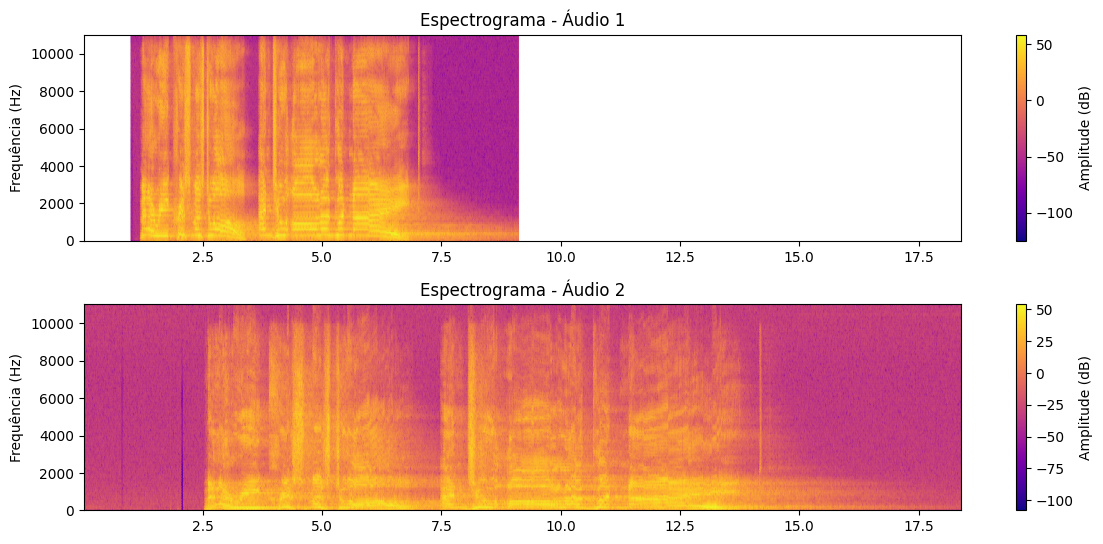

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from scipy.io import wavfile

# Carregar os áudios

rate1, audio1 = wavfile.read("revStageE.wav")
rate2, audio2 = wavfile.read(r"audios/12.wav")

# Ajustar para o mesmo tamanho (duração)
max_length = max(audio1.shape[0], audio2.shape[0])

# Usa apenas o primeiro canal, se estéreo
if len(audio1.shape) > 1:
    audio1 = audio1[:, 0]
if len(audio2.shape) > 1:
    audio2 = audio2[:, 0]

# Preencher com zeros para ajustar ao mesmo tamanho
audio1 = np.pad(audio1, (0, max_length - len(audio1)), mode='constant')
audio2 = np.pad(audio2, (0, max_length - len(audio2)), mode='constant')

# Calcular espectrogramas
frequencies1, times1, Sxx1 = spectrogram(audio1, fs=rate1)
frequencies2, times2, Sxx2 = spectrogram(audio2, fs=rate2)

# Garantir que os espectrogramas tenham a mesma dimensão
min_freq_bins = min(Sxx1.shape[0], Sxx2.shape[0])
min_time_bins = min(Sxx1.shape[1], Sxx2.shape[1])

Sxx1 = Sxx1[:min_freq_bins, :min_time_bins]
Sxx2 = Sxx2[:min_freq_bins, :min_time_bins]

frequencies = frequencies1[:min_freq_bins]
times = times1[:min_time_bins]

# Calcular a diferença em dB
difference = 10 * (np.log10(Sxx2 + 1e-10) - np.log10(Sxx1 + 1e-10))

# Plotar os espectrogramas
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx1), shading='gouraud', cmap='plasma')
plt.title('Espectrograma - Áudio 1')
plt.ylabel('Frequência (Hz)')
plt.colorbar(label='Amplitude (dB)')

plt.subplot(3, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx2), shading='gouraud', cmap='plasma')
plt.title('Espectrograma - Áudio 2')
plt.ylabel('Frequência (Hz)')
plt.colorbar(label='Amplitude (dB)')

plt.tight_layout()
plt.show()


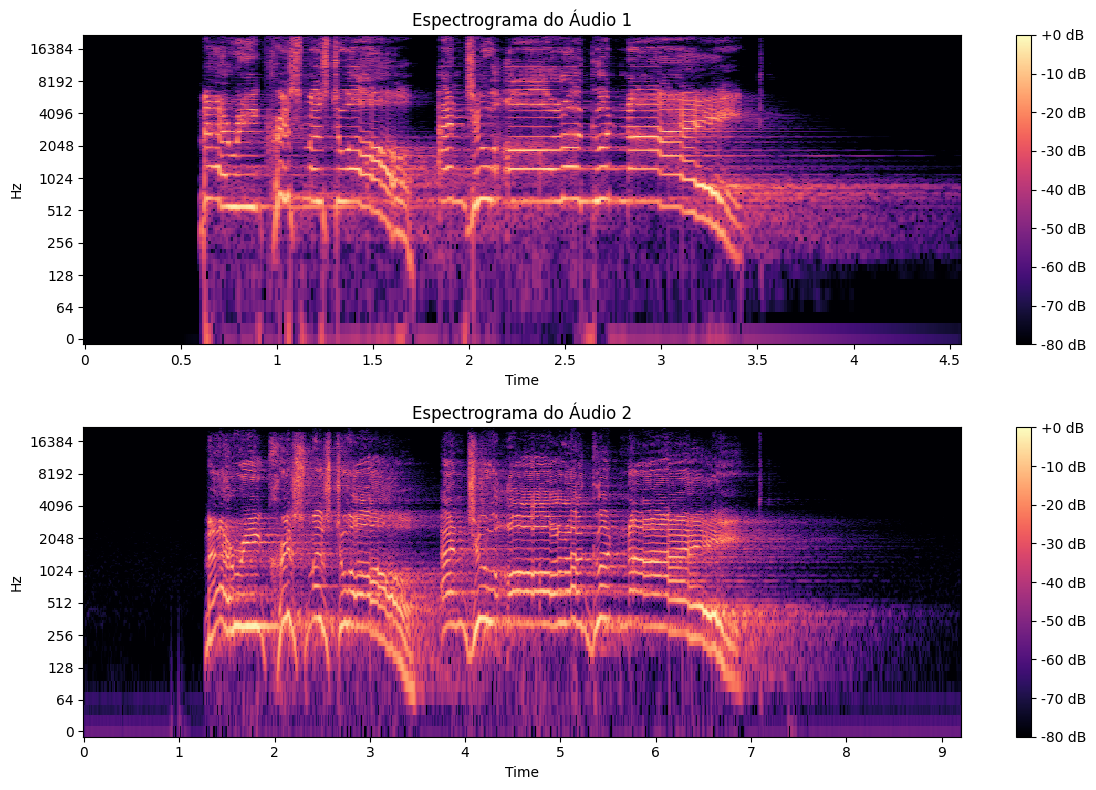

In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from pathlib import Path

def load_and_spectrogram(audio_path, n_fft=2048, hop_length=512):
    audio, sr = librosa.load(audio_path, sr=None)  # Carregar o áudio
    spectrogram = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))  # Calcular o espectrograma
    return spectrogram, sr

def plot_spectrograms(spectrogram1, spectrogram2, sr, hop_length):
    plt.figure(figsize=(12, 8))

    # Espectrograma do primeiro áudio
    plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram1, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.title('Espectrograma do Áudio 1')
    plt.colorbar(format='%+2.0f dB')

    # Espectrograma do segundo áudio
    plt.subplot(2, 1, 2)
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram2, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.title('Espectrograma do Áudio 2')
    plt.colorbar(format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

audio1_path = Path("revStageE.wav")  # Substitua pelo caminho real do primeiro áudio
audio2_path = Path("audios/12.wav")  # Substitua pelo caminho real do segundo áudio

# Carregar e calcular espectrogramas
spectrogram1, sr = load_and_spectrogram(audio1_path)
spectrogram2, sr = load_and_spectrogram(audio2_path)

# Plotar os espectrogramas para visualização
plot_spectrograms(spectrogram1, spectrogram2, sr, hop_length=512)

In [4]:
import librosa

def noteToHz(note, octave):
    """Converte uma nota musical em sua frequência."""
    A4 = 440  # Frequência do Lá4
    semitone_ratio = 2 ** (1 / 12)
    notes = {'C': -9, 'C#': -8, 'D': -7, 'D#': -6, 'E': -5, 'F': -4, 
             'F#': -3, 'G': -2, 'G#': -1, 'A': 0, 'A#': 1, 'B': 2}
    n = notes[note.upper()] + 12 * (octave - 4)
    return A4 * (semitone_ratio ** n)

print(noteToHz('C', 4))
print(librosa.note_to_hz('C'))

261.6255653005985
16.351597831287414
